In [15]:
import torch
#Optional: Plot the results
import matplotlib.pyplot as plt
import os 
#print("GPU verfügbar:", torch.cuda.is_available())
#print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")
symbol  = "BTC-USD"

import datetime
import pandas as pd
#from yahooquery import Ticker
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

# Fetch historical Tesla stock data using yahooquery

#end= "2025-01-01",
#historical_data = ticker.history(  start= "2020-01-01",  interval='1d')

folderpath_models ="/Users/Shared/ai_work/Trainingdata/models/autogluon/"
folderpath_traininglogs =" /Users/Shared/ai_work/Trainingdata/models/neuralprophet/traininglogs/"
folderpath_result = "/Users/Shared/ai_work/Trainingdata/ml_results/autogluon/"
#folderpath_charts = "D:\\OneDrive\\AI Workspace\\models\\neuralprophet\\charts\\"
folderpath_historie = "/Users/Shared/ai_work/Trainingdata/ml_data/yh_his/D1/"
folderpath_auto_models ="/Users/Shared/ai_work/Trainingdata/models//autogluon/"
#folderpath_analyse = "D:\\OneDrive\\AI Workspace\\results\\neuralprophet\\"
#folderpath_results = "D:\\OneDrive\\AI Workspace\\results\\nrp_results\\"

if not os.path.isdir(folderpath_result):
    os.makedirs(folderpath_result, exist_ok=True)
    print(f"Erstellt Ordner: {folderpath_result}")
else:
    print(f"Ordner existiert: {folderpath_result}")

# 🟢 Step 1: Download Tesla stock data
#ticker = "TSLA"



#df = yf.download(ticker, period="5y", interval="1d")
data = pd.read_csv (folderpath_historie+symbol+".csv")
df_his = data.copy()
#historical_data = ticker.history(  period="max")
# Clean and prepare the data
#data = historical_data.reset_index()

data = data[['date', 'close']]
data.rename(columns={'date': 'timestamp', 'close': 'item_value'}, inplace=True)
lastBars = 0
n_tail = 400  #600
#data = df.copy()
df = data[:len(data) - lastBars]
if n_tail > 0: df = df.tail(n_tail)
df = df.reset_index()

print (df)
df['item_id'] = symbol
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a TimeSeriesDataFrame for AutoGluon
train_data = TimeSeriesDataFrame(df)

# Define the prediction length (100 days)
prediction_length = 100

"""
# Train the AutoGluon model, explicitly setting the frequency
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    #path="AutogluonPredictor/",
    path=folderpath_auto_models +symbol+"/",
    #"D://OneDrive//AI Workspace//workspaces//dev_ws1//AutoGluon//AutogluonPredictor//models//",
    target="item_value",
    eval_metric="RMSE",
    freq="D" # Set the frequency to daily ('D')
)


predictor.fit(
    train_data,
    presets="best_quality",
    time_limit=300
)
"""
model_path = folderpath_auto_models + symbol + "/"
predictor =""
isretrain = False 
if os.path.isdir(model_path) and os.listdir(model_path) and isretrain == False:
    # Modell existiert → lade es
    print(f"Lade bestehendes Modell...")
    predictor = TimeSeriesPredictor.load(model_path)
else:
    # Modell existiert nicht → trainiere neu
    print(f"Trainiere neues Modell...")
    predictor = TimeSeriesPredictor(
        prediction_length=prediction_length,
        path=model_path,
        target="item_value",
        eval_metric="RMSE",
        freq="B"
    )
    predictor.fit(train_data, presets="best_quality", time_limit=300)





Beginning AutoGluon training... Time limit = 300s
AutoGluon will save models to '/Users/Shared/ai_work/Trainingdata/models/autogluon/BTC-USD'


=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.14
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 25.1.0: Mon Oct 20 19:33:00 PDT 2025; root:xnu-12377.41.6~2/RELEASE_ARM64_T6020
CPU Count:          12
GPU Count:          1
Memory Avail:       14.04 GB / 32.00 GB (43.9%)
Disk Space Avail:   78.70 GB / 1858.19 GB (4.2%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'freq': 'B',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 2,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'item_value',
 'time_limit': 300,
 'verbosity': 2}

train_data with frequency 'D' has been resampled to frequency 'B'.
Provided train_data has 286 rows, 1 time ser

Ordner existiert: /Users/Shared/ai_work/Trainingdata/ml_results/autogluon/
     index   timestamp    item_value
0     3700  2024-11-03  68741.117188
1     3701  2024-11-04  67811.507812
2     3702  2024-11-05  69359.562500
3     3703  2024-11-06  75639.078125
4     3704  2024-11-07  75904.859375
..     ...         ...           ...
395   4095  2025-12-03  93527.804688
396   4096  2025-12-04  92141.625000
397   4097  2025-12-05  89387.757812
398   4098  2025-12-06  89272.375000
399   4099  2025-12-07  90157.851562

[400 rows x 3 columns]
Trainiere neues Modell...


Models that will be trained: ['SeasonalNaive', 'RecursiveTabular', 'DirectTabular', 'NPTS', 'DynamicOptimizedTheta', 'AutoETS', 'ChronosZeroShot[bolt_base]', 'ChronosFineTuned[bolt_small]', 'TemporalFusionTransformer', 'DeepAR', 'PatchTST', 'TiDE']
Training timeseries model SeasonalNaive. Training for up to 22.9s of the 297.2s of remaining time.
	-13343.9125   = Validation score (-RMSE)
	0.01    s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Training timeseries model RecursiveTabular. Training for up to 24.8s of the 297.2s of remaining time.
	-15182.2456   = Validation score (-RMSE)
	0.36    s     = Training runtime
	0.09    s     = Validation (prediction) runtime
Training timeseries model DirectTabular. Training for up to 27.0s of the 296.7s of remaining time.
	-18633.1148   = Validation score (-RMSE)
	0.31    s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Training timeseries model NPTS. Training for up to 29.6s of the 296.4s of re

┏━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   ┃ Name  ┃ Type                   ┃ Params ┃ Mode  ┃  FLOPs ┃               In sizes ┃               Out sizes ┃
┡━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0 │ model │ TemporalFusionTransfo… │  115 K │ train │ 31.6 M │   [[1, 200], [1, 200], │ [[[1, 100, 9]], [1, 1], │
│   │       │                        │        │       │        │    [1, 1], [1, 1], [1, │                 [1, 1]] │
│   │       │                        │        │       │        │  300, 3], [1, 300, 0], │                         │
│   │       │                        │        │       │        │  [1, 200, 1], [1, 200, │                         │
│   │       │                        │        │       │        │                    0]] │                         │
└───┴───────┴────────────────────────┴────────┴───────┴────────┴────────────────────────┴─────────────────────────┘

Trainable params: 115 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 115 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 218                                                                                         
Modules in eval mode: 0                                                                                            
Total FLOPs: 31.6 M

Traceback (most recent call last):
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/trainer.py", line 357, in _train_and_save
    model = self._train_single(train_data, model, val_data=val_data, time_limit=time_limit)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/trainer.py", line 273, in _train_single
    model.fit(
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/abstract/abstract_timeseries_model.py", line 515, in fit
    self._fit(
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/multi_window/multi_window_model.py", line 137, in _fit
    model.fit(
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/abstract/abstract_timeseries_model.py", line 515, in fit
    self._fit(
  Fi

┏━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃   ┃ Name  ┃ Type        ┃ Params ┃ Mode  ┃ FLOPs ┃                                     In sizes ┃     Out sizes ┃
┡━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 0 │ model │ DeepARModel │ 25.7 K │ train │ 506 M │  [[1, 1], [1, 1], [1, 979, 4], [1, 979], [1, │ [1, 100, 100] │
│   │       │             │        │       │       │                           979], [1, 100, 4]] │               │
└───┴───────┴─────────────┴────────┴───────┴───────┴──────────────────────────────────────────────┴───────────────┘

Trainable params: 25.7 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 25.7 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 11                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 506 M

Traceback (most recent call last):
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/trainer.py", line 357, in _train_and_save
    model = self._train_single(train_data, model, val_data=val_data, time_limit=time_limit)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/trainer.py", line 273, in _train_single
    model.fit(
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/abstract/abstract_timeseries_model.py", line 515, in fit
    self._fit(
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/multi_window/multi_window_model.py", line 137, in _fit
    model.fit(
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/abstract/abstract_timeseries_model.py", line 515, in fit
    self._fit(
  Fi

┏━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name  ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ model │ PatchTSTModel │  1.3 M │ train │     0 │
└───┴───────┴───────────────┴────────┴───────┴───────┘

Trainable params: 1.3 M                                                                                            
Non-trainable params: 384                                                                                          
Total params: 1.3 M                                                                                                
Total estimated model params size (MB): 5                                                                          
Modules in train mode: 34                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Traceback (most recent call last):
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/trainer.py", line 357, in _train_and_save
    model = self._train_single(train_data, model, val_data=val_data, time_limit=time_limit)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/trainer.py", line 273, in _train_single
    model.fit(
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/abstract/abstract_timeseries_model.py", line 515, in fit
    self._fit(
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/multi_window/multi_window_model.py", line 137, in _fit
    model.fit(
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/abstract/abstract_timeseries_model.py", line 515, in fit
    self._fit(
  Fi

┏━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name  ┃ Type      ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ model │ TiDEModel │  3.1 M │ train │     0 │
└───┴───────┴───────────┴────────┴───────┴───────┘

Trainable params: 3.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 3.1 M                                                                                                
Total estimated model params size (MB): 12                                                                         
Modules in train mode: 65                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Traceback (most recent call last):
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/trainer.py", line 357, in _train_and_save
    model = self._train_single(train_data, model, val_data=val_data, time_limit=time_limit)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/trainer.py", line 273, in _train_single
    model.fit(
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/abstract/abstract_timeseries_model.py", line 515, in fit
    self._fit(
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/multi_window/multi_window_model.py", line 137, in _fit
    model.fit(
  File "/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/abstract/abstract_timeseries_model.py", line 515, in fit
    self._fit(
  Fi

In [16]:


# ... (rest of your prediction and plotting code)

# Generate predictions for the next 100 days
predictions = predictor.predict(train_data)

# Create a future dataframe for the next 100 days
"""
future_timestamps = pd.date_range(
    start=df['timestamp'].max() + pd.Timedelta(days=1),
    periods=prediction_length,
    freq='B'
)
"""
future_timestamps = pd.date_range(start=data.index[-1], periods= prediction_length+1, freq='B')[1:]


future_df = pd.DataFrame({'timestamp': future_timestamps})
future_df['item_id'] = symbol
future_df = TimeSeriesDataFrame(future_df)

# Predict the future values
future_predictions = predictor.predict(train_data, known_covariates=future_df)

# Combine the results for easier viewing
combined_results = pd.concat([
    df[['timestamp', 'item_value']],
    future_predictions.reset_index().rename(columns={'mean': 'predicted_value'})[['timestamp', 'predicted_value']]
], ignore_index=True)

# Print the last 100 predicted values
#print(combined_results.tail(100))
df_result = pd.DataFrame(combined_results)
#print (df_result)
print (future_df)

data with frequency 'D' has been resampled to frequency 'B'.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
/opt/anaconda3/envs/multimodel/lib/python3.11/site-packages/autogluon/timeseries/models/local/npts.py:80: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  ts.index = ts.index.to_period(freq=dummy_freq)
data with frequency 'D' has been resampled to frequency 'B'.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


Empty TimeSeriesDataFrame
Columns: []
Index: [(BTC-USD, 1970-01-02 00:00:00.000004099), (BTC-USD, 1970-01-05 00:00:00.000004099), (BTC-USD, 1970-01-06 00:00:00.000004099), (BTC-USD, 1970-01-07 00:00:00.000004099), (BTC-USD, 1970-01-08 00:00:00.000004099), (BTC-USD, 1970-01-09 00:00:00.000004099), (BTC-USD, 1970-01-12 00:00:00.000004099), (BTC-USD, 1970-01-13 00:00:00.000004099), (BTC-USD, 1970-01-14 00:00:00.000004099), (BTC-USD, 1970-01-15 00:00:00.000004099), (BTC-USD, 1970-01-16 00:00:00.000004099), (BTC-USD, 1970-01-19 00:00:00.000004099), (BTC-USD, 1970-01-20 00:00:00.000004099), (BTC-USD, 1970-01-21 00:00:00.000004099), (BTC-USD, 1970-01-22 00:00:00.000004099), (BTC-USD, 1970-01-23 00:00:00.000004099), (BTC-USD, 1970-01-26 00:00:00.000004099), (BTC-USD, 1970-01-27 00:00:00.000004099), (BTC-USD, 1970-01-28 00:00:00.000004099), (BTC-USD, 1970-01-29 00:00:00.000004099), (BTC-USD, 1970-01-30 00:00:00.000004099), (BTC-USD, 1970-02-02 00:00:00.000004099), (BTC-USD, 1970-02-03 00:00:00.

In [17]:
def convertDataframeResults (df, symbol, type, future_dates, future_predictions, df_his):
    #df_his = df_his.set_index('date')
    df_result = pd.DataFrame({
        "Symbol": symbol, 
        "Type":  type,
         "Date": future_dates,
         "Close": future_predictions,
         "Source": 0, 
         "Change": 0
    })
    
    lastclose = df['item_value'].iloc[-1]
    lastdate = df['timestamp'].iloc[-1]
    print ("lastclose", lastclose , " lastdate: ", lastdate,   " len(df_result) :  ", len(df_result))
    change_percent =  []
    source = []
    prev_source = 0
    
    for i in range(len(df_result)):
        if i == 0:
        # Erste Zeile: Vergleich mit Basiswert
          #change = ((df_result.loc[i, 'Close'] - lastclose) / lastclose) 
          change = 0
           
          source_value  = lastclose
          #lastclose + change* lastclose
          prev_source = lastclose
        else:
         # Vergleich mit vorheriger Zeile
         
          prev_value = df_result.loc[i - 1 , 'Close']
          #prev_source = df_result.loc[i-1, 'Source']
          change = ((df_result.loc[i, 'Close'] - prev_value) / prev_value) 
          source_value =prev_source + change*prev_source
          prev_source = source_value
          #source_value = prev_value + change*prev_source
        change_percent.append(change)
        source.append(source_value)
    df_result['Change'] = change_percent
    df_result['Source'] = source_value
    

    return df_result

In [18]:
df_result = df_result.tail(prediction_length)
df_result = df_result[['timestamp', 'predicted_value']]
df_result.reset_index(drop=True, inplace=True)
print (df_result)


    timestamp  predicted_value
0  2025-12-08     93053.036309
1  2025-12-09     96131.359813
2  2025-12-10     96255.414164
3  2025-12-11     97361.759452
4  2025-12-12     94398.810440
..        ...              ...
95 2026-04-20     93071.515954
96 2026-04-21     94282.928187
97 2026-04-22     97799.219123
98 2026-04-23     96407.793161
99 2026-04-24     95113.328484

[100 rows x 2 columns]


In [19]:
print (df.head())

   index  timestamp    item_value  item_id
0   3700 2024-11-03  68741.117188  BTC-USD
1   3701 2024-11-04  67811.507812  BTC-USD
2   3702 2024-11-05  69359.562500  BTC-USD
3   3703 2024-11-06  75639.078125  BTC-USD
4   3704 2024-11-07  75904.859375  BTC-USD


lastclose 90157.8515625  lastdate:  2025-12-07 00:00:00  len(df_result) :   100


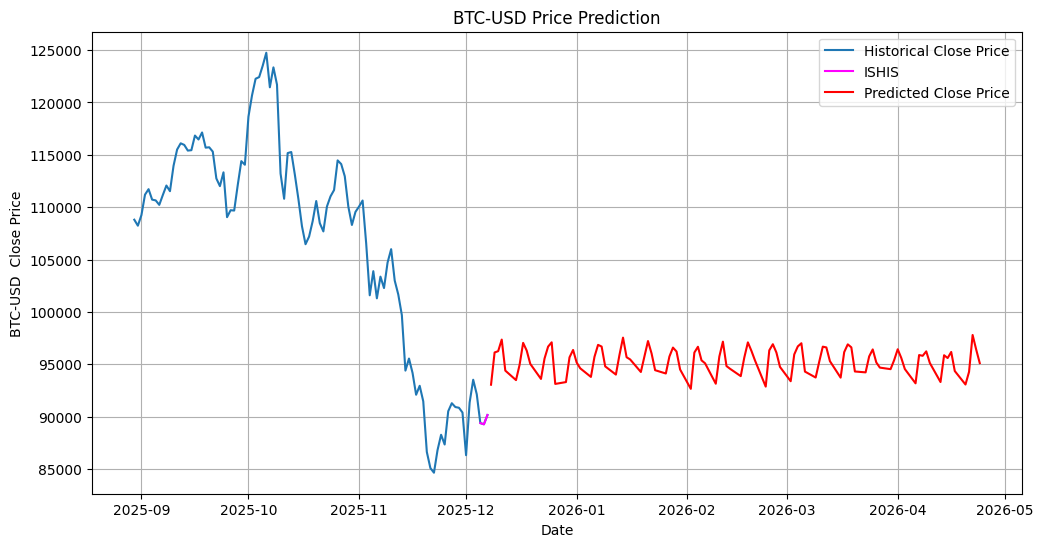

In [20]:

df_result = convertDataframeResults (df,symbol,"ATG", df_result['timestamp'], df_result['predicted_value'],df_his )
df_result.to_csv (folderpath_result + symbol +".csv")
#df_result ['Symbol']  = symbol
#df_result ['Type']  = "ATG"
#df_result ['Date']  = df_result ['timestamp'] 



combined_results = combined_results.tail(200)  # Limit to the last 200 entries for better visualization
df_his = df_his.tail(lastBars+3)  # Limit to the last 200 entries for better visualization
df_his['date'] = pd.to_datetime(df_his['date'])
plt.figure(figsize=(12, 6))
plt.plot(combined_results['timestamp'], combined_results['item_value'], label='Historical Close Price')
plt.plot(df_his['date'], df_his['close'], label='ISHIS', color='magenta')
plt.plot(combined_results['timestamp'].tail(100), combined_results['predicted_value'].tail(100), label='Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel( symbol + '  Close Price')
plt.title( symbol + ' Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
print (df_result)

     Symbol Type       Date         Close        Source    Change
0   BTC-USD  ATG 2025-12-08  93053.036309  92154.041299  0.000000
1   BTC-USD  ATG 2025-12-09  96131.359813  92154.041299  0.033081
2   BTC-USD  ATG 2025-12-10  96255.414164  92154.041299  0.001290
3   BTC-USD  ATG 2025-12-11  97361.759452  92154.041299  0.011494
4   BTC-USD  ATG 2025-12-12  94398.810440  92154.041299 -0.030432
..      ...  ...        ...           ...           ...       ...
95  BTC-USD  ATG 2026-04-20  93071.515954  92154.041299 -0.013629
96  BTC-USD  ATG 2026-04-21  94282.928187  92154.041299  0.013016
97  BTC-USD  ATG 2026-04-22  97799.219123  92154.041299  0.037295
98  BTC-USD  ATG 2026-04-23  96407.793161  92154.041299 -0.014227
99  BTC-USD  ATG 2026-04-24  95113.328484  92154.041299 -0.013427

[100 rows x 6 columns]
